In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '03 METCO Engineering Proposal - COD EBS JOC FINAL 08.10.2018.pdf',
 '3A16ACD1.tmp',
 '3AEACB23.tmp',
 '614742C8.tmp',
 '8642012A.tmp',
 'B310FC8D.tmp',
 'Building Metadata.csv',
 'data_banknote_authentication.txt',
 'metco.ipynb',
 'metco_assignment',
 'metco_assignment.docx',
 'metco_assignment.pdf',
 'neelima_1.ipynb',
 'neelima_kt_data_science.zip',
 'pima-indians-diabetes.csv',
 'Predictions.csv',
 'Task Description.docx',
 'Test Data.csv',
 'Training Data.csv',
 'Untitled.ipynb']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data_banknote_authentication.txt", names = ['variance','skewness','kurtosis','entropy','class'])

In [6]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [24]:
df.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Text(0, 0.5, 'count')

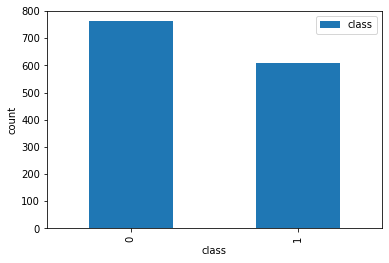

In [15]:
df.groupby('class').agg({'class':'count'}).plot(kind= 'bar')
plt.ylabel('count')

In [16]:
import seaborn as sns

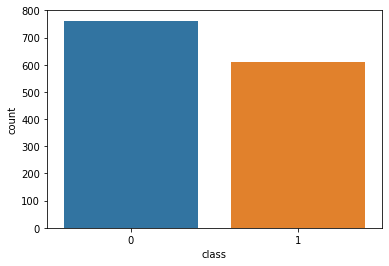

In [18]:
sns.countplot(data = df, x = 'class')

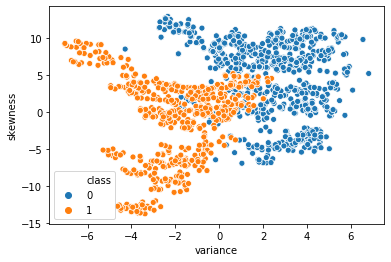

In [19]:
sns.scatterplot(data = df, x='variance', y='skewness', hue = 'class')

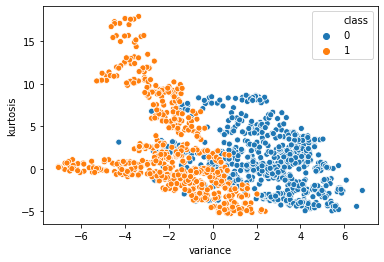

In [20]:
sns.scatterplot(data = df, x='variance', y='kurtosis', hue = 'class')

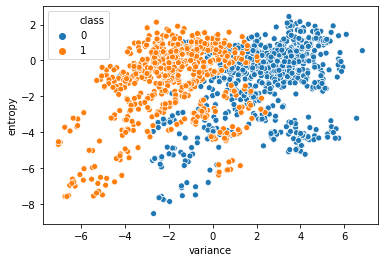

In [21]:
sns.scatterplot(data = df, x='variance', y='entropy', hue = 'class')

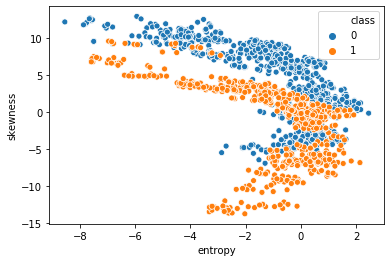

In [22]:
sns.scatterplot(data = df, x='entropy', y='skewness', hue = 'class')

# Normalization

In [25]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


(x - min) / (max - min)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(df.variance)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
df.iloc[:,:4]

,variance,skewness,kurtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [44]:
df_sc = pd.DataFrame(scaler.fit_transform(df.iloc[:,:4]))

In [46]:
df_sc.columns = df.columns[:4]

In [47]:
df_sc.head()

,variance,skewness,kurtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


# Training and Testing Data

In [48]:
full = pd.concat([df_sc, df['class']], axis = 1)

In [49]:
full.head()

,variance,skewness,kurtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_sc, df['class'], test_size=0.30, random_state=42)

In [53]:
X_train.head()

,variance,skewness,kurtosis,entropy
879,0.466819,0.568407,0.166321,0.675014
783,0.541994,0.641115,0.033588,0.409640
605,0.584651,0.828496,0.167390,0.627158
1253,0.179492,0.044442,0.892920,0.641034
497,0.504373,0.455362,0.592832,0.845975


In [54]:
y_train.head()

879     1
783     1
605     0
1253    1
497     0
Name: class, dtype: int64

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
clf.predict_proba(X_train)

array([[0.24238365, 0.75761635],
       [0.33660593, 0.66339407],
       [0.86614524, 0.13385476],
       ...,
       [0.04266453, 0.95733547],
       [0.08267521, 0.91732479],
       [0.12694518, 0.87305482]])

In [61]:
y_train_pred = clf.predict(X_train)

In [62]:
from sklearn.metrics import confusion_matrix

In [65]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

In [75]:
fn

12

# Accuracy

In [66]:
(tn + tp) / (tp + tn + fp + fn)

0.9625

    1     0
 1 415   24
 0  12  509

In [77]:
prec = tp / (tp + fp)

In [78]:
prec

0.9453302961275627

In [79]:
recall = tp / (tp + fn)

In [80]:
recall

0.9718969555035128

In [ ]:
(a + b) /2

In [81]:
f1 = 2 * prec * recall / (prec + recall)

In [82]:
f1

0.9584295612009238

In [76]:
confusion_matrix(y_train, y_train_pred)

array([[509,  24],
       [ 12, 415]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score, classification_report

In [68]:
accuracy_score(y_train, y_train_pred)

0.9625

In [71]:
print(classification_report(y_train, y_train_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       533
           1       0.95      0.97      0.96       427

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960



# Balanced vs Imbalanced Data

- Accuracy is a good measure for balanced data
- Not a good measure for imbalanced data

# Blind Model

In [83]:
990 / 1000

0.99

   1   0
1  0   0
0 10  990

In [85]:
rec = 0 / (0 + 10)

# Testing 

In [86]:
y_test_pred = clf.predict(X_test)

In [87]:
accuracy_score(y_test, y_test_pred)

0.9684466019417476

In [89]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       229
           1       0.97      0.96      0.96       183

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



# Multi Class Classification

# Iris Data

In [91]:
from sklearn.datasets import load_iris

In [92]:
iris = load_iris()

In [95]:
X = iris.data[:, :]
y = iris.target

In [100]:
X = pd.DataFrame(X)

In [101]:
X.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [102]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [110]:
X_train

,Sepal Length,Sepal Width,Petal Length,Petal Width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [111]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_train_pred = clf.predict(X_train)

In [114]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [115]:
confusion_matrix(y_train, y_train_pred)

array([[31,  0,  0],
       [ 0, 34,  3],
       [ 0,  1, 36]], dtype=int64)